## Assignment 1

In [1]:
from scipy.stats import entropy
p=[35/50,15/50]
E=entropy(p,base=2)
print(E)

0.8812908992306927


## Project 1

In [2]:
##From Data given it is required to develop the model to predict the profit of the company. Dataset filename: Companies-profit.csv

## Import Required Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline

## Import Dataset

In [4]:
p1 = pd.read_csv("Companies-profit.csv")
p1.head(3)

,R&D Spend,Administration,Marketing Spend,City,Profit
0,165349.20,136897.80,471784.10,Mumbai,192261.83
1,162597.70,151377.59,443898.53,Bangalore,191792.06
2,153441.51,101145.55,407934.54,Delhi,191050.39


## Visual Analysis of the Data

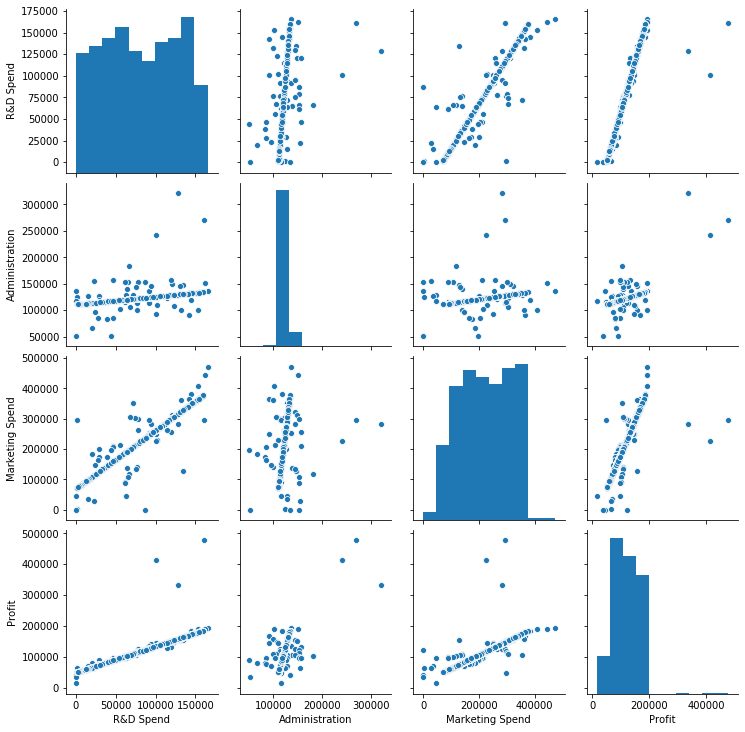

In [5]:
sea.pairplot(p1)

In [6]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   City             1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [7]:
p1.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [8]:
p1.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
City               0
Profit             0
dtype: int64

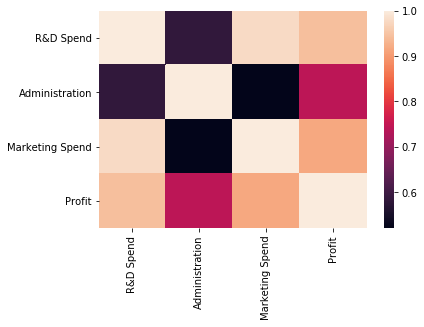

In [9]:
sea.heatmap(p1.corr())

## Spliting into X and Y

In [10]:
X=p1.iloc[:,0:-1].values
y=p1.iloc[:,-1].values

## Encoding Numerical Data

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

## Spliting of Training and Testing Data

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the dataset with LinearRegrression

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## prediction of the test set

In [14]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 89790.62  89012.03]
 [ 88427.07  87654.56]
 [ 94894.68  94093.35]
 [175680.87 175396.26]
 [ 83411.73  83356.62]
 [110571.9  110395.79]
 [132145.23 105008.31]
 [ 91473.38  90687.29]
 [164597.05 164180.27]
 [ 53222.83  53483.76]
 [ 66950.19  66273.35]
 [150566.44 150393.72]
 [126915.21 125971.23]
 [ 59337.86  58694.93]
 [177513.91 176344.52]
 [ 75316.28  75297.23]
 [118248.14 118219.39]
 [164574.41 163462.67]
 [170937.29 132602.65]
 [182069.12 181574.5 ]
 [118845.03  97483.56]
 [ 85669.95  84909.72]
 [180992.59 180684.33]
 [ 84145.08  83391.64]
 [105005.84 104159.47]
 [101233.57 100404.  ]
 [ 53831.08  64926.08]
 [ 56881.41  56944.49]
 [ 68896.39  68210.89]
 [210040.01 191792.06]
 [120778.72 120738.7 ]
 [111724.87 110848.57]
 [101487.91 101352.27]
 [137959.03 137842.47]
 [ 63969.96  63306.4 ]
 [108857.91 107994.38]
 [186014.73 185502.53]
 [171442.64 171176.92]
 [174644.27 174364.28]
 [117671.49 117645.31]
 [ 96731.38  96616.93]
 [165452.26 164336.61]
 [107724.34 106865.86]
 [ 50194.54

In [15]:
prediction = y_pred.reshape(-1,1)
prediction.shape

(200, 1)

In [16]:
trained = y_test.reshape(-1,1)
trained.shape

(200, 1)

## Measuring the Parameter

In [17]:
regressor.coef_

array([ 5.26e+02, -3.54e+02, -1.72e+02,  5.26e-01,  8.44e-01,  1.08e-01])

In [18]:
regressor.intercept_

-51561.464947779255

## Accuracy of the Model

In [19]:
regressor.score(X_train,y_train)

0.9585497032796175

## Evaluation of the Model

In [20]:
from sklearn import metrics

from sklearn import metrics  
print('root sqaured Error:', 
      metrics.r2_score(trained, prediction)) 

root sqaured Error: 0.911269589226881


## Project 2

## Importing Dataset from Sklearn

In [21]:
from sklearn import datasets
wine = datasets.load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [22]:
p2 = pd.DataFrame(wine.data,columns=wine.feature_names)
p2.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [23]:
p2['target_names']=wine.target
p2

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target_names
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [24]:
p2.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target_names                    0
dtype: int64

In [31]:
p2['target_names'].value_counts()

1    71
0    59
2    48
Name: target_names, dtype: int64

## Performing Visualization of Dataset

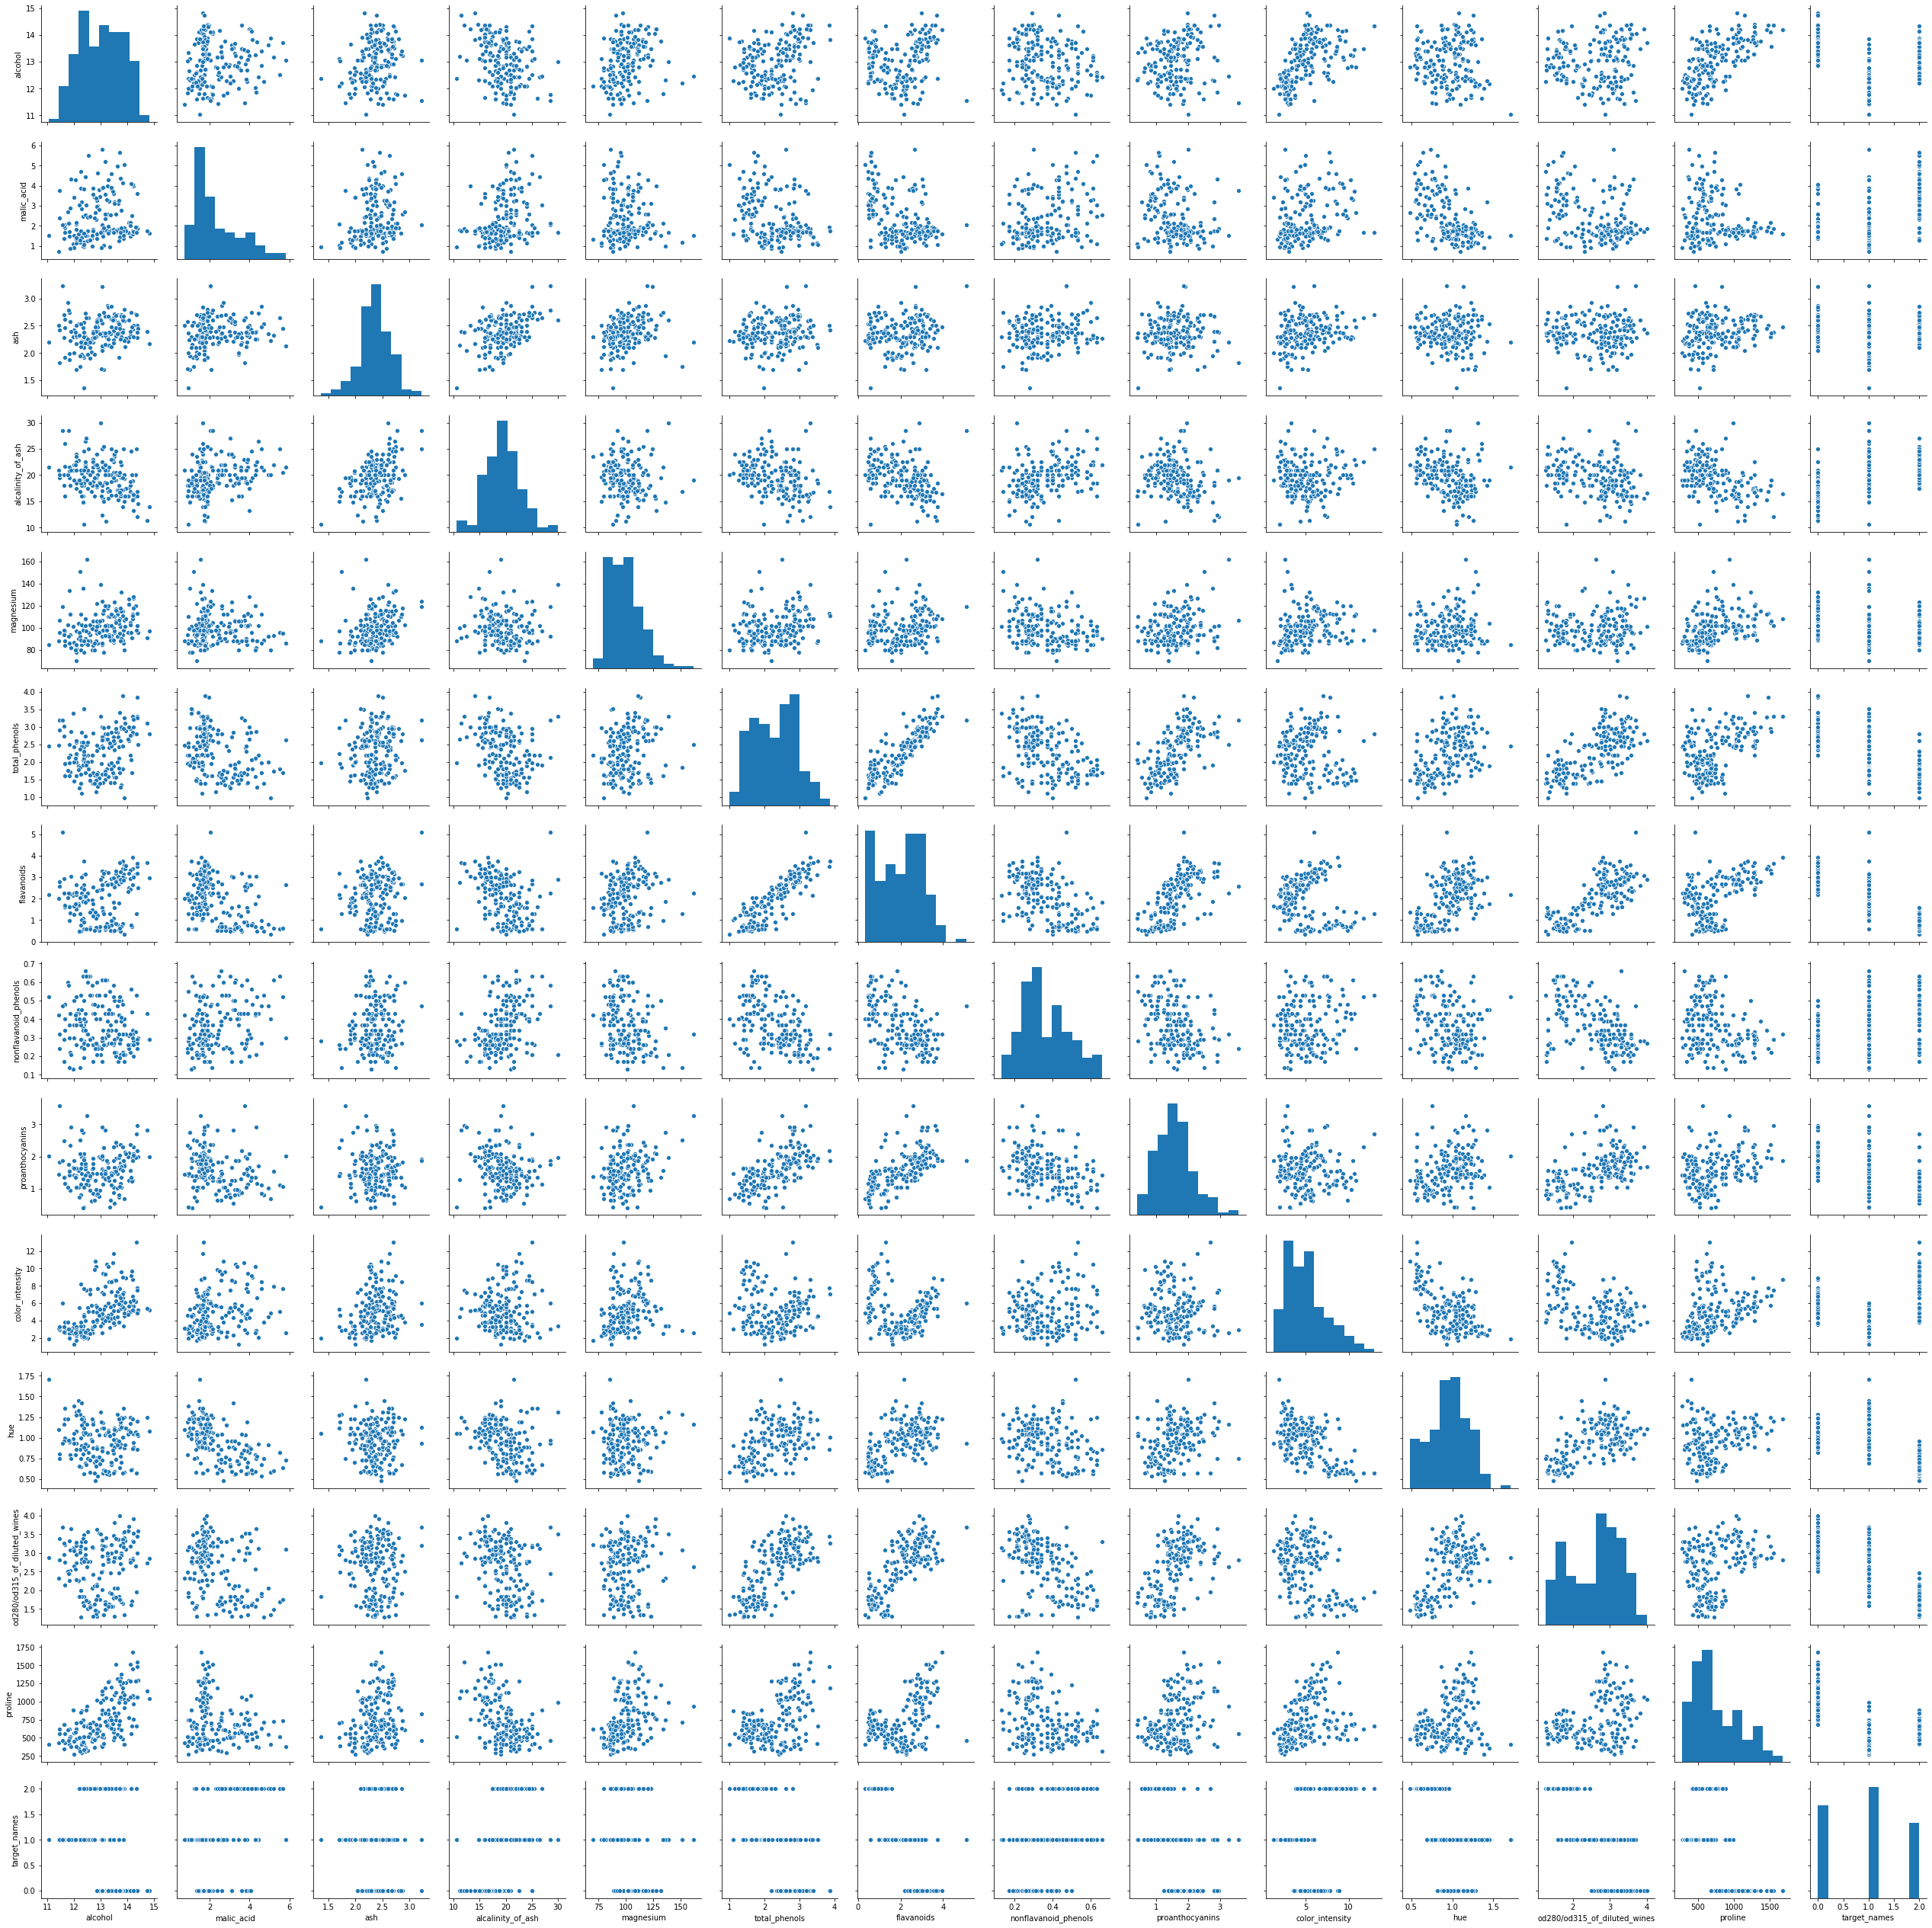

In [25]:
sea.pairplot(p2)

## Spliting Features

In [36]:
x2 = p2.iloc[:, :-1].values
y2= p2.iloc[:, -1].values

## Spliting Training and Dataset

In [37]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.25, random_state = 0)

In [107]:
x2_train

array([[1.36e+01, 3.10e+00, 2.56e+00, ..., 9.60e-01, 3.36e+00, 8.45e+02],
       [1.26e+01, 2.46e+00, 2.20e+00, ..., 7.30e-01, 1.58e+00, 6.95e+02],
       [1.20e+01, 1.09e+00, 2.30e+00, ..., 9.90e-01, 3.13e+00, 8.86e+02],
       ...,
       [1.24e+01, 1.61e+00, 2.19e+00, ..., 1.06e+00, 2.96e+00, 3.45e+02],
       [1.39e+01, 1.68e+00, 2.12e+00, ..., 9.10e-01, 3.33e+00, 9.85e+02],
       [1.42e+01, 2.51e+00, 2.48e+00, ..., 6.20e-01, 1.71e+00, 6.60e+02]])

In [108]:
y2_train

array([[0],
       [2],
       [1],
       [2],
       [0],
       [2],
       [2],
       [0],
       [2],
       [0],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [0],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [0],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [2],
       [0],
       [2],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [2],
       [1],
       [0],
       [1],
       [1],
       [1],
       [2],
       [0],
       [2],
       [2],
       [0],
       [0],
       [1],
       [2],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [2],
       [1],
       [0],
    

## Training model with GaussianNB

In [43]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x2_train, y2_train)

C:\Users\venkat\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
y2_pred = gnb.predict(x2_test)
y2_pred.reshape(len(y2_pred),1)

array([[0],
       [2],
       [1],
       [0],
       [1],
       [1],
       [0],
       [2],
       [1],
       [1],
       [2],
       [2],
       [0],
       [0],
       [2],
       [1],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [2],
       [1],
       [1],
       [2],
       [0],
       [0],
       [1],
       [1],
       [1]])

In [49]:
print(np.concatenate((y2_pred.reshape(len(y2_pred),1), y2_test.reshape(len(y2_test),1)),1))

[[0 0]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [0 1]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## Evaluating the Model

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y2_test, y2_pred)
print(cm)
accuracy_score(y2_test, y2_pred)

[[16  0  0]
 [ 2 18  1]
 [ 0  0  8]]


0.9333333333333333

## Training Dataset with MultinomialNB

In [54]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x2_train, y2_train)
y2a_pred = mnb.predict(x2_test)


C:\Users\venkat\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
y2a_pred

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1,
       1])

## Comparing actual and Predicted

In [56]:
print(np.concatenate((y2a_pred.reshape(len(y2a_pred),1), y2_test.reshape(len(y2_test),1)),1))

[[0 0]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## Evaluating Model

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y2_test, y2a_pred)
print(cm)
accuracy_score(y2_test, y2a_pred)

[[15  1  0]
 [ 0 20  1]
 [ 1  0  7]]


0.9333333333333333

## Result : multinomial calssifer is best model which having higher accuracy

## Project 3

In [62]:
p3= pd.read_csv('Disease.csv')
p3.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [63]:
p3['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

## Encoding using LabelEncoder

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
p3['Kyphosis']= le.fit_transform(p3['Kyphosis'])

## Spliting Features

In [109]:
x3 = p3.iloc[:, 1:].values
y3 = p3.iloc[:, 0:1].values


## Spliting Training and Test Dataset

In [111]:
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.25, random_state = 0)


In [103]:
x3_train 

array([[ 37,   3,  16],
       [157,   3,  13],
       [ 36,   4,  13],
       [ 73,   5,   1],
       [ 61,   4,   1],
       [  1,   4,  15],
       [ 87,   4,  16],
       [175,   5,  13],
       [118,   3,  16],
       [113,   2,  16],
       [ 61,   2,  17],
       [102,   3,  13],
       [ 20,   6,   9],
       [  2,   3,  13],
       [140,   5,  11],
       [  4,   3,  16],
       [148,   3,  16],
       [140,   4,  15],
       [131,   2,   3],
       [ 82,   5,  14],
       [125,   2,  11],
       [139,   3,  10],
       [120,   2,  13],
       [158,   3,  14],
       [130,   5,  13],
       [ 18,   4,  11],
       [168,   3,  18],
       [139,  10,   6],
       [ 27,   4,   9],
       [151,   2,  16],
       [130,   4,   1],
       [177,   2,  14],
       [ 15,   7,   2],
       [ 93,   3,  16],
       [ 80,   5,  16],
       [ 71,   3,   5],
       [ 42,   7,   6],
       [  1,   3,  16],
       [  1,   2,  16],
       [ 81,   4,   1],
       [ 78,   6,  15],
       [  9,   2

In [112]:
y3_train

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

## Training Model

In [113]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x3_train, y3_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Predicting Test set

In [114]:
y3_pred = classifier.predict(x3_test)
print(np.concatenate((y3_pred.reshape(len(y3_pred),1), y3_test.reshape(len(y3_test),1)),1))

[[0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


## Evaluating Model

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y3_test, y3_pred)
print(cm)
accuracy_score(y3_test, y3_pred)

[[13  3]
 [ 2  3]]


0.7619047619047619

## Undergoing Feature Scaling for Better Performance

In [117]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x3a_train = sc.fit_transform(x3_train)
x3a_test = sc.transform(x3_test)

## Training Dataset

In [119]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x3a_train, y3_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [123]:
y3a_pred = classifier.predict(x3a_test)
print(np.concatenate((y3a_pred.reshape(len(y3a_pred),1), y3_test.reshape(len(y3_test),1)),1))

[[0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


## Evaluating After Feature Scaling

In [124]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y3_test, y3a_pred)
print(cm)
accuracy_score(y3_test, y3a_pred)

[[13  3]
 [ 2  3]]


0.7619047619047619

## Project 4

In [129]:
from sklearn import datasets
iris = datasets.load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [130]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


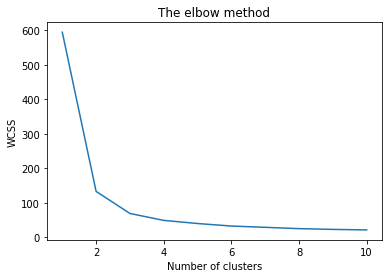

In [137]:
x = iris_df.iloc[:, 0:-1].values
y= iris_df.iloc[:,-1].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()    

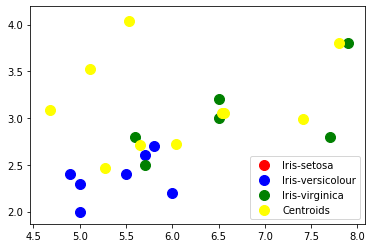

In [138]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 0], x[y == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [135]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

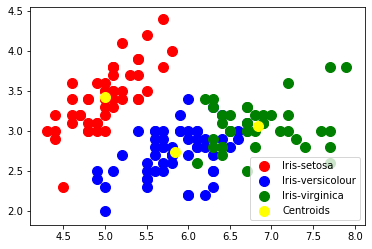

In [136]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()